In [1]:
from prophet import Prophet
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

/home/guts/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/guts/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
Importing plotly failed. Interactive plots will not work.


In [6]:
# Load the data

path = "/home/guts/Documents/accel_data/acceleration_data.csv"
df = pd.read_csv(path, header=0, index_col=0)
df.index = pd.to_datetime(df.index)
dataset = pd.DataFrame()
dataset['ds'] = df.index
dataset['y'] = df.values
dataset['cap'] = 10.5

dataset

,ds,y,cap
0,2024-08-09 14:23:41,10.110164,10.5
1,2024-08-09 14:23:42,9.555678,10.5
2,2024-08-09 14:23:44,9.325334,10.5
3,2024-08-09 14:23:48,9.532025,10.5
4,2024-08-09 14:23:49,9.468498,10.5
...,...,...,...
18662,2024-08-10 01:05:10,9.490646,10.5
18663,2024-08-10 01:05:13,10.447052,10.5
18664,2024-08-10 01:05:15,9.073947,10.5
18665,2024-08-10 01:05:16,10.054511,10.5


In [18]:
# Fit the model

m = Prophet(growth='logistic', interval_width=0.9)
m.fit(dataset)

14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:22 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Make future predictions

future = m.make_future_dataframe(freq='min', periods=500)
future['cap'] = 10.5
forecast = m.predict(future)

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-08-09 14:23:41,9.889370,9.134941,10.613966
1,2024-08-09 14:23:42,9.889358,9.150065,10.638184
2,2024-08-09 14:23:44,9.889336,9.166883,10.672011
3,2024-08-09 14:23:48,9.889290,9.131564,10.627805
4,2024-08-09 14:23:49,9.889279,9.115116,10.594969
...,...,...,...,...
19162,2024-08-10 09:22:57,9.840278,9.144817,10.582760
19163,2024-08-10 09:23:57,9.840297,9.064589,10.583297
19164,2024-08-10 09:24:57,9.840316,9.115098,10.584296
19165,2024-08-10 09:25:57,9.840336,9.099146,10.586855


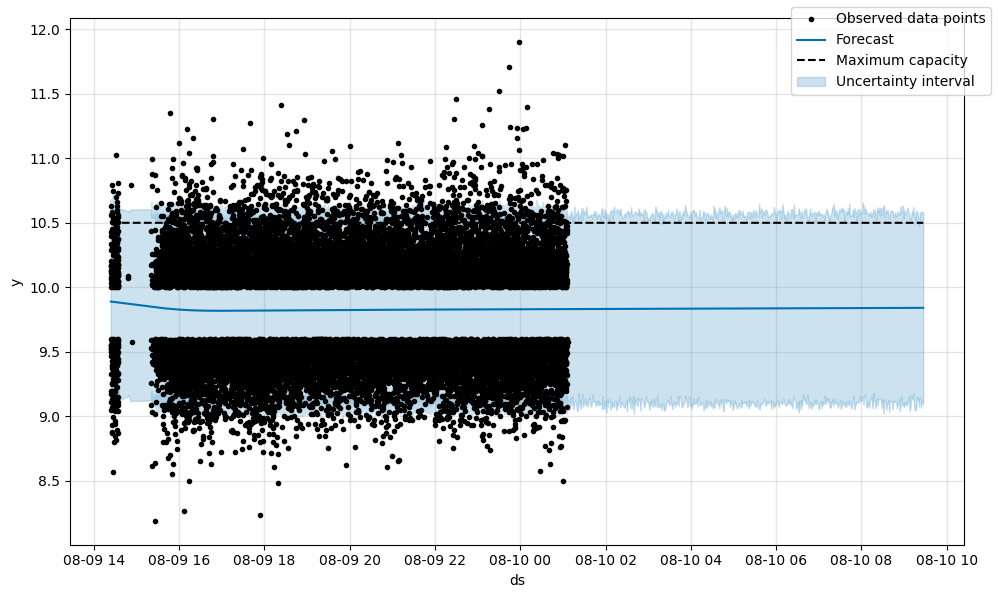

In [21]:
# Plot the forecast

fig1 = m.plot(forecast)
fig1.legend()